<a href="https://colab.research.google.com/github/zasminah/Python_DataVisualization/blob/main/Stock_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/16fU_uHrr4bu8Tbgw53COIzVaVMGa5g1l#scrollTo=r7ejWcK2hVkH

In [1]:
pip install mplfinance

     |████████████████████████████████| 61kB 3.6MB/s 


In [2]:
import numpy as np
import datetime as dt
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import mplfinance as mpf

Pandas Remote Data Access 

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

1) Get Information
Samsung Electronics, LG Electronics, Naver, KAKAO

In [3]:
span = 90 # days 
end = dt.datetime.now()
#start = dt.datetime(2021,1,1)
start = end - dt.timedelta(days=span)
start

datetime.datetime(2021, 1, 8, 5, 46, 47, 878239)

In [4]:
SSE = pdr.data.DataReader('005930','naver',start,end).astype(float)
LGE = pdr.data.DataReader('066570','naver',start,end).astype(float)
KAKAO = pdr.data.DataReader('035720','naver',start,end).astype(float)

In [5]:
SSE.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-11,90000.0,96800.0,89500.0,91000.0,90306177.0
2021-01-12,90300.0,91400.0,87800.0,90600.0,48682416.0
2021-01-13,89800.0,91200.0,89100.0,89700.0,36068848.0
2021-01-14,88700.0,90000.0,88700.0,89700.0,26393970.0
2021-01-15,89800.0,91800.0,88000.0,88000.0,33431809.0


In [6]:
SSE.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-04-02,84000.0,85200.0,83900.0,84800.0,22997538.0
2021-04-05,85800.0,86000.0,84800.0,85400.0,16255990.0
2021-04-06,86200.0,86200.0,85100.0,86000.0,19042023.0
2021-04-07,86100.0,86200.0,85400.0,85600.0,17885538.0
2021-04-08,85700.0,85700.0,84100.0,84400.0,15167770.0


In [7]:
SSE.filter(['Open','High','Low', 'Close']).min().min()

80600.0

In [8]:
def StockPlt(df, title, buying, buying_date, selling):
  plt.rcParams['figure.figsize'] = [14,7]
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3, colspan=1)
  av = plt.subplot2grid((4,1), (3,0), rowspan=1, colspan=1, sharex=ax)  
  ax.plot(df.index, df['High'], color='gray', label='High', linestyle='--')
  ax.plot(df.index, df['Close'], color='black', label='Close', linestyle='-')
  ax.plot(df.index, df['Low'], color='lightgray', label='Low', linestyle=':')
  ax.hlines(buying, start, end, color='blue', alpha=0.5 )
  ax.text(buying_date, buying*1.005, 'buying', color='blue')
  ymin = df.filter(['Open', 'High', 'Low', 'Close']).min().min()
  ax.vlines(buying_date, ymin, buying, color='blue', alpha=0.5)
  target_selling = buying * (1 + selling)
  ax.hlines(target_selling, start, end, color='red', alpha=0.5)
  ax.text(end-dt.timedelta(days=span/2), target_selling*0.99, 'target selling', color='red')
  ax.legend()
  ax.set_title(title, size=10)
  av.bar(df.index, df['Volume'], color='gray')

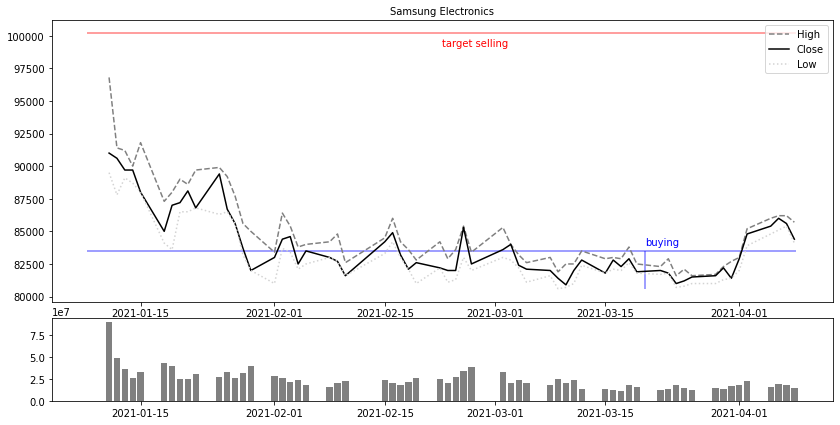

In [9]:
StockPlt(SSE,'Samsung Electronics', 83500, dt.datetime(2021, 3, 20), 0.2)

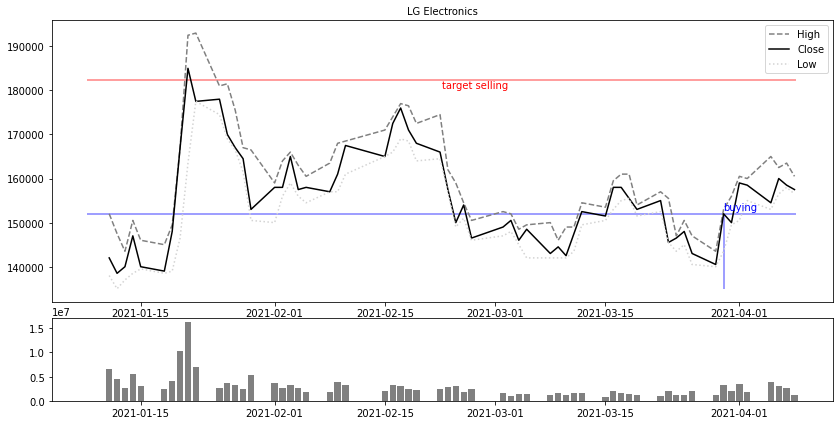

In [10]:
StockPlt(LGE,'LG Electronics', 152000, dt.datetime(2021, 3, 30), 0.2)

matplotlib finance (mplfinance)



*   candlestick chart instead of line chart with
*   moving average value (3, 6, 9) days




In [11]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh#1

In [12]:
def StockMpf(df, title):
  mpf_style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.size': 8})
  fig = mpf.figure(figsize=(14, 7), style=mpf_style) 
  ax = fig.add_subplot(2,1,1) 
  av = fig.add_subplot(2,1,2, sharex=ax)  
  ax.set_title(title, size=10)
  mpf.plot(df, 
           type='candle',
           ax=ax,  
           volume=av,        
           mav=(3,6,9),
           show_nontrading=True         
           )

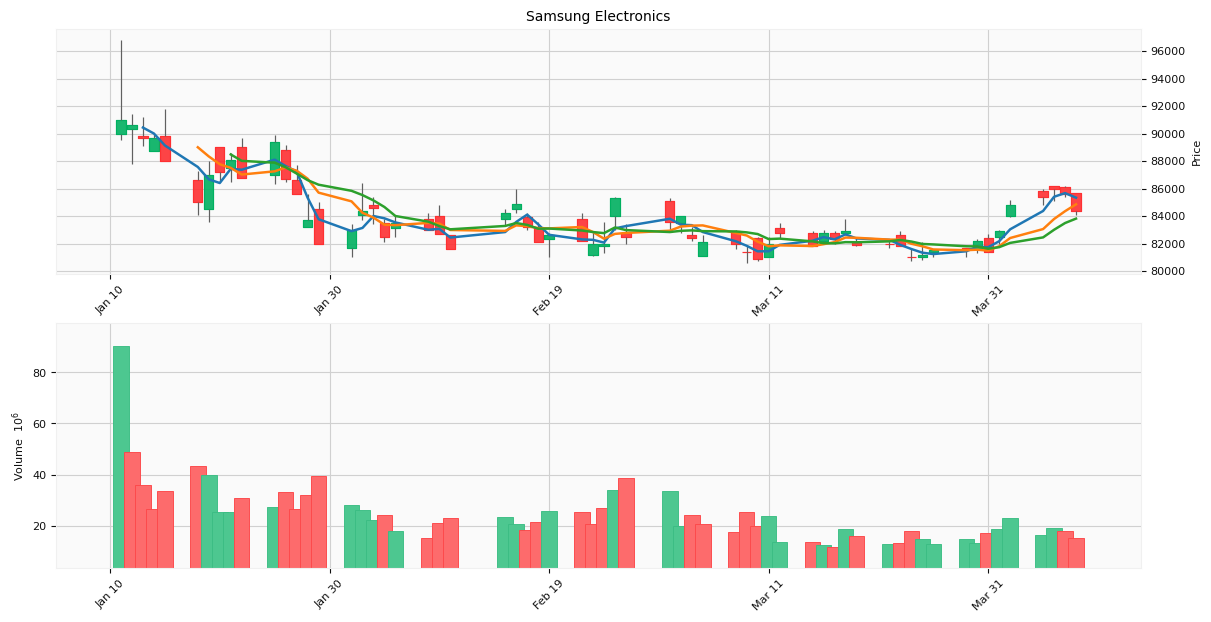

In [13]:
StockMpf(SSE,'Samsung Electronics')

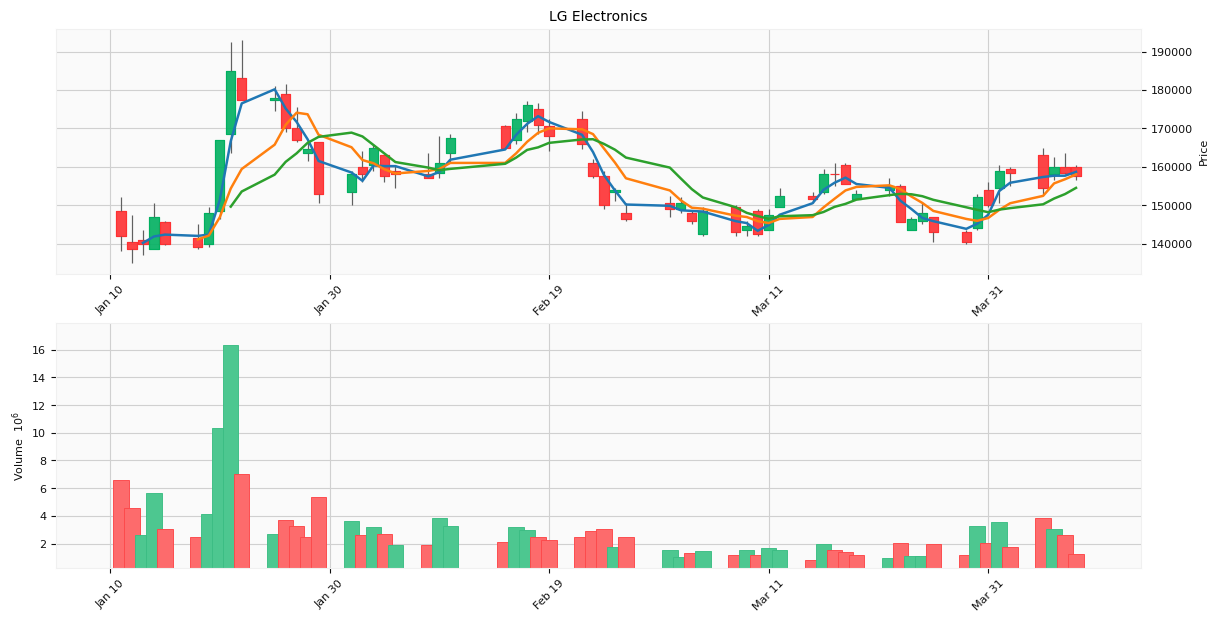

In [14]:
StockMpf(LGE,'LG Electronics')

In [15]:
def StockMpf_Classic(df, title):
  mpf_style = mpf.make_mpf_style(base_mpf_style='classic', rc={'font.size': 8})
  fig = mpf.figure(figsize=(14, 7), style=mpf_style) 
  ax = fig.add_subplot(2,1,1) 
  av = fig.add_subplot(2,1,2, sharex=ax)  
  ax.set_title(title, size=10)
  mpf.plot(df, type='candle',
          ax=ax,  
          volume=av,        
          mav=(3,6,9)         
          )

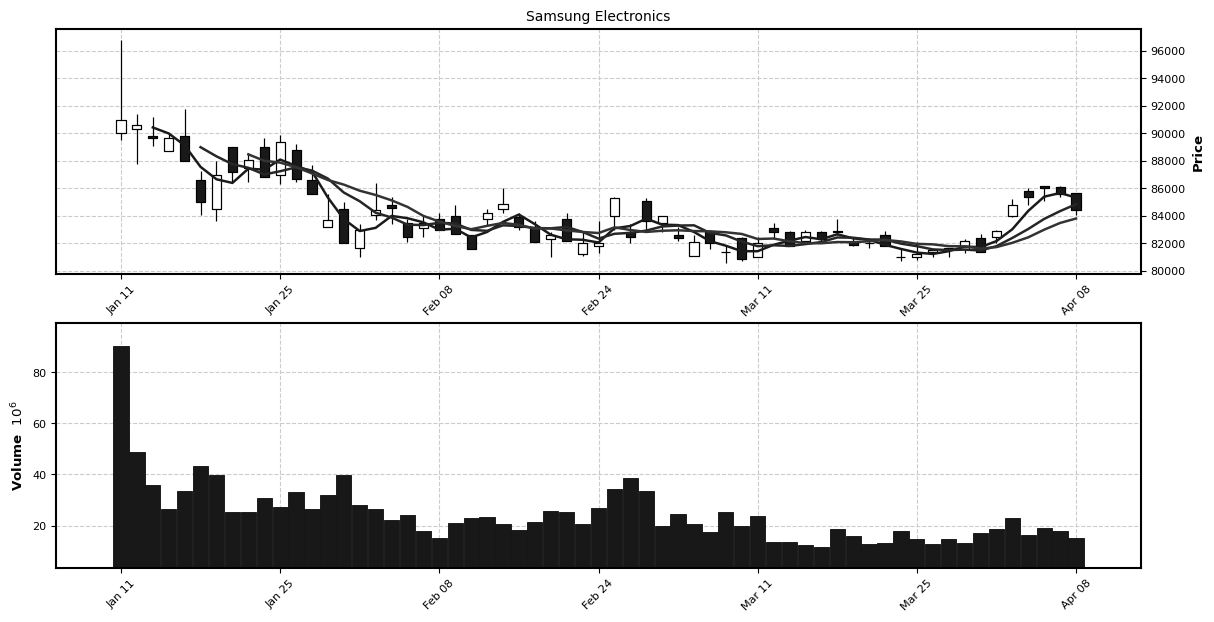

In [16]:
StockMpf_Classic(SSE,'Samsung Electronics')